# Normal distribution fitting using MLE

In [1]:
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from pyomo.environ import *

(array([  3.,   3.,  33., 107., 197., 259., 231., 109.,  42.,  16.]),
 array([-6.41446352, -4.35551921, -2.2965749 , -0.23763059,  1.82131372,
         3.88025803,  5.93920233,  7.99814664, 10.05709095, 12.11603526,
        14.17497957]),
 <BarContainer object of 10 artists>)

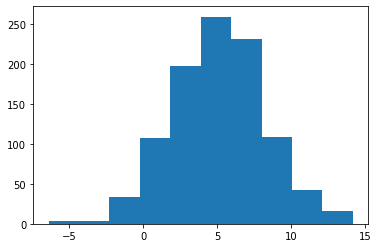

In [2]:
random_normal = st.norm.rvs(size=1000, loc = 5, scale = 3)
plt.hist(random_normal)

In [3]:
model = ConcreteModel()
model.mu = Var()
model.sigma = Var(domain=PositiveReals)
model.data_for_fitting = random_normal.tolist()
model.N = len(random_normal)
def normal_neg_ll(m):
    neg_ll = 0
    for i in range(m.N):
        this_ll = -(log(m.sigma) + 0.5 * log(2*np.pi) + 0.5 * ((m.data_for_fitting[i] - m.mu)/m.sigma)**2)
        neg_ll = neg_ll + this_ll
    return(-neg_ll)
model.obj= Objective(rule=normal_neg_ll, sense=minimize)
solver = SolverFactory('ipopt')
solver.solve(model)
print()
print('*** Solution *** :')
print('mu:', value(model.mu))
print('sigma:', value(model.sigma))
print('*** Raw ***:')
print('mean:', random_normal.mean())
print('sd:', random_normal.std())


*** Solution *** :
mu: 5.108302835651586
sigma: 3.0947198855464597
*** Raw ***:
mean: 5.108302835651586
sd: 3.0947198854527938
